# Importing Libraries

In [99]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt


Dataset Link: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset

# Test set Image Processing

In [64]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)
class_name = validation_set.class_names
print(class_name)

Found 17572 files belonging to 38 classes.
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Tw

In [100]:
cnn = tf.keras.models.load_model('2trained_plant_disease_model2.keras')
#model = load_model('2trained_plant_disease_model2.keras')


#Visualising and Performing Prediction on Single image

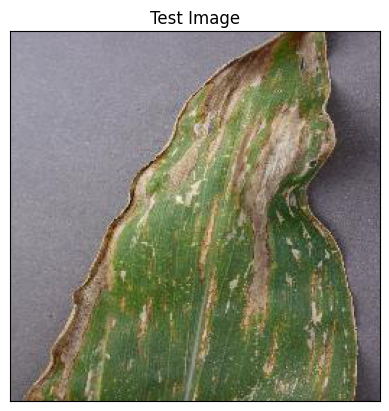

In [106]:
#Test Image Visualization
import cv2
image_path = '/Users/abdullahsaqib/Desktop/0ba90f90-3702-438a-908b-85871f3a34cb___RS_GLSp 4342.JPG'
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image 
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

## Testing Model

In [107]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


In [108]:
print(predictions)

[[1.5284961e-06 1.0862973e-07 5.6824302e-07 2.3812785e-07 4.1268131e-10
  2.1868975e-07 2.5402564e-09 9.7639501e-01 4.3302759e-07 1.0727243e-02
  8.0850654e-08 1.1088085e-08 4.1300937e-06 1.4011128e-07 1.7506494e-09
  2.9049398e-09 4.9700893e-06 9.7920347e-09 1.5657449e-08 2.9499263e-09
  1.3786758e-06 9.9867138e-06 7.3546340e-07 2.1258762e-08 9.5825321e-09
  1.9541301e-06 8.6754914e-03 2.9273550e-09 1.1738050e-05 2.1724758e-05
  4.1391789e-03 4.2068152e-08 1.6730093e-06 5.7360983e-09 1.1184737e-07
  8.0804710e-08 7.3823664e-10 1.2597071e-06]]


In [109]:
result_index = np.argmax(predictions) #Return index of max element
print(result_index)

7


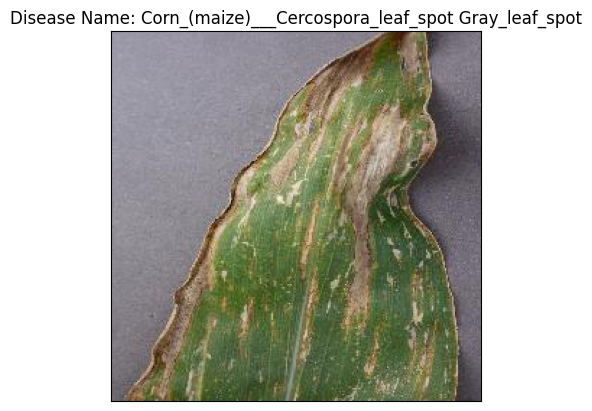

In [110]:
# Displaying the disease prediction
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()